## Pareto Front

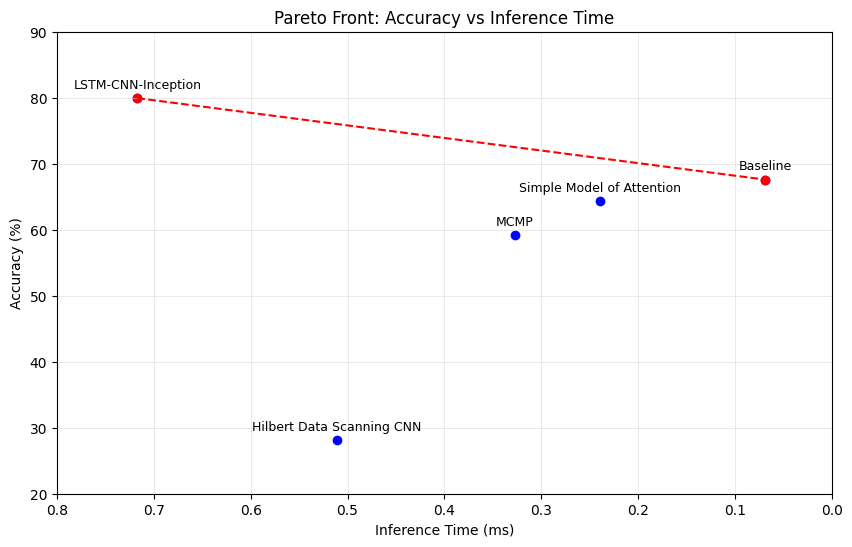

In [1]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Baseline", "LSTM-CNN-Inception", "MCMP", "Simple Model of Attention", "Hilbert Data Scanning CNN"]
accuracy = np.array([67.59, 79.94, 59.21, 64.35, 28.08])  
inference_time = np.array([0.0687, 0.717, 0.327, 0.239, 0.511]) 

sorted_indices = np.argsort(-accuracy)
sorted_accuracy = accuracy[sorted_indices]
sorted_inference_time = inference_time[sorted_indices]
sorted_models = [models[i] for i in sorted_indices]

pareto_front = [0]  
for i in range(1, len(sorted_accuracy)):
    if sorted_inference_time[i] < sorted_inference_time[pareto_front[-1]]:
        pareto_front.append(i)

plt.figure(figsize=(10, 6))
plt.scatter(inference_time, accuracy, color='blue')

pareto_front_points = np.array([sorted_inference_time[i] for i in pareto_front])
pareto_front_accuracy = np.array([sorted_accuracy[i] for i in pareto_front])
plt.scatter(pareto_front_points, pareto_front_accuracy, color='red')

plt.plot(pareto_front_points, pareto_front_accuracy, color='red', linestyle='--')

for i, model in enumerate(models):
    plt.text(inference_time[i], accuracy[i] + 3.0, model, fontsize=9, ha='center', va='top')

plt.xlim(0.8, 0)
plt.ylim(20, 90)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5, alpha=0.7)


plt.xlabel("Inference Time (ms)")
plt.ylabel("Accuracy (%)")
plt.title("Pareto Front: Accuracy vs Inference Time")

plt.show()
